In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.model_selection import train_test_split
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# *Loading The Data*

In [2]:
df = pd.read_csv("../input/gtsrb-german-traffic-sign/Test.csv")

In [3]:
df.head()


,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [4]:
df.describe()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId
count,12630.000000,12630.000000,12630.000000,12630.000000,12630.000000,12630.000000,12630.000000
mean,50.507759,50.364450,5.998021,5.982423,44.864450,44.758116,15.551069
std,25.088483,23.698908,1.543954,1.427424,23.776102,22.494697,11.947123
min,25.000000,25.000000,1.000000,5.000000,20.000000,20.000000,0.000000
25%,34.000000,35.000000,5.000000,5.000000,29.000000,29.000000,5.000000
50%,43.000000,43.000000,6.000000,6.000000,38.000000,38.000000,12.000000
75%,58.000000,57.000000,6.000000,6.000000,53.000000,52.000000,25.000000
max,266.000000,232.000000,23.000000,19.000000,244.000000,212.000000,42.000000


In [5]:
width = int(df['Width'].mean())
height = int(df['Height'].mean())
print(f'Average Width For Images Is : {width}')
print(f'Average Height For Images Is : {height}')

Average Width For Images Is : 50
Average Height For Images Is : 50


In [6]:
dropped_columns = ['Width','Height','Roi.X1','Roi.Y1','Roi.X2','Roi.Y2']
df.drop(dropped_columns, axis=1 , inplace = True)

In [7]:
df.head()

,ClassId,Path
0,16,Test/00000.png
1,1,Test/00001.png
2,38,Test/00002.png
3,33,Test/00003.png
4,11,Test/00004.png


In [8]:
df.shape

(12630, 2)

In [9]:
label_names = pd.read_csv("../input/gtsrblabel-names/label_names.csv")
print(f'Number Of Clases = {label_names.shape[0]}')
label_names

Number Of Clases = 43


,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


# *Data Visualization*

In [10]:
def plot_distribution(df):
    labels_dict = dict(label_names.values)
    df = df.replace({"ClassId": labels_dict})
    df.groupby(['ClassId']).count().plot( kind = 'bar' , figsize=(15, 7))

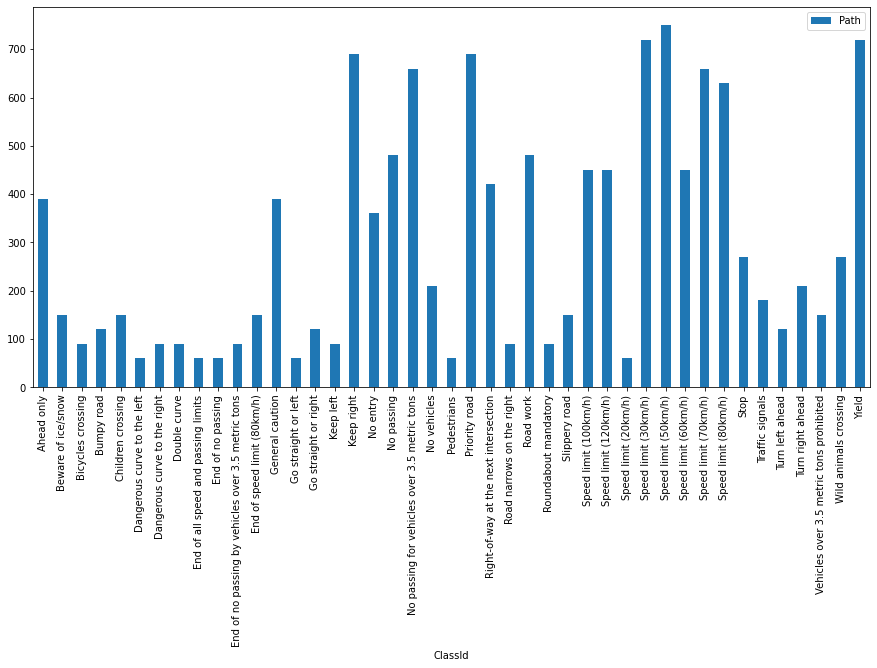

In [11]:
plot_distribution(df)
# We Have imbalance Data then in case of bad accuracy we can use data augmentation to balance it

## Images Visualization

(50, 50, 3)
(50, 50, 3)
(50, 50, 3)
(50, 50, 3)
(50, 50, 3)
(50, 50, 3)
(50, 50, 3)
(50, 50, 3)
(50, 50, 3)
(50, 50, 3)


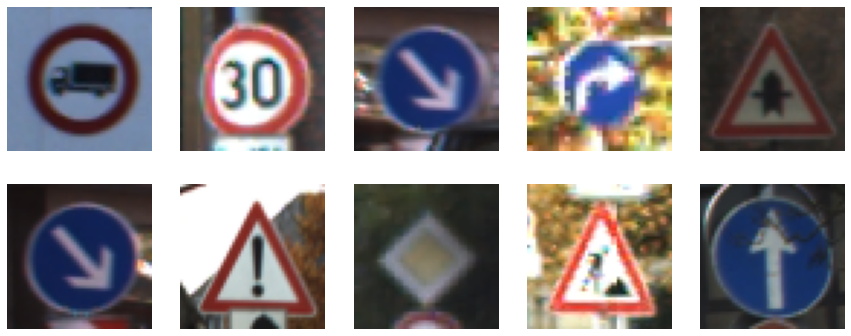

In [12]:
images_folder = '../input/gtsrb-german-traffic-sign/'
dim = (width, height) 

fig, axs = plt.subplots(2,5, figsize=(15, 6))
axs = axs.ravel()

for i in range(10):
    img = cv2.imread(images_folder+df['Path'][i])
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    print (resized.shape)
    axs[i].set_axis_off()
    axs[i].imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))

## Visualize With Grayscale

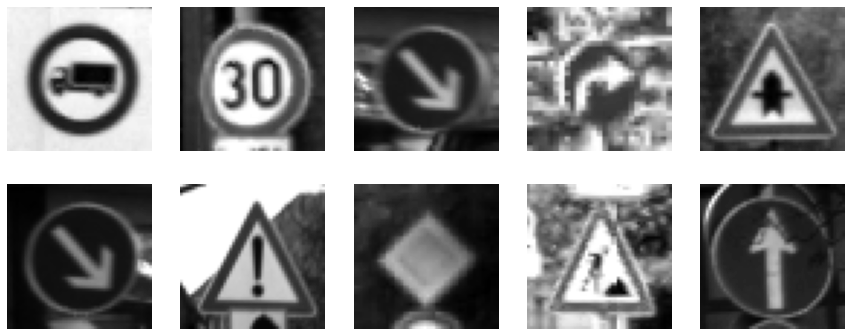

In [13]:
fig, axs = plt.subplots(2,5, figsize=(15, 6))
axs = axs.ravel()

for i in range(10):
    img = cv2.imread(images_folder+df['Path'][i])
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    axs[i].set_axis_off()
    axs[i].imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY) , cmap='gray' )


## Visualize Normalized Images

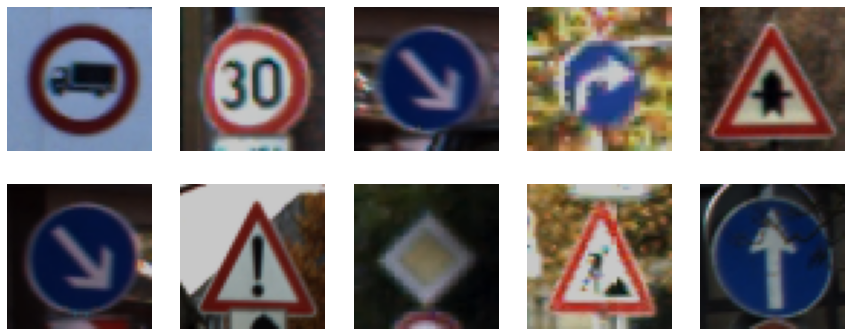

In [14]:
fig, axs = plt.subplots(2,5, figsize=(15, 6))
axs = axs.ravel()

for i in range(10):
    img = cv2.imread(images_folder+df['Path'][i])
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    image_norm = cv2.normalize(resized, None, alpha=0,beta=200, norm_type=cv2.NORM_MINMAX)
    axs[i].set_axis_off()
    axs[i].imshow(cv2.cvtColor(image_norm, cv2.COLOR_BGR2RGB))
    
# In This Case There is a small difference between normalized and original

# *Splitting Data*

In [15]:
Data = []

# We will train the model with greyscale normalized images

for index, row in df.iterrows():
    #print(f'Current : {index}')
    img = cv2.imread(images_folder+row['Path'])
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    image_normalized = cv2.normalize(resized, None, alpha=0,beta=200, norm_type=cv2.NORM_MINMAX)
    gray_normalized = cv2.cvtColor(image_normalized, cv2.COLOR_BGR2GRAY)
    Data.append(gray_normalized)

In [16]:
Data = np.array(Data)

In [17]:
Data.shape

(12630, 50, 50)

In [18]:
labels = df['ClassId']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(Data, labels, test_size=0.20, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0) # 0.25 x 0.8 = 0.2

In [20]:
print(f'Train Shape : {X_train.shape}')
print(f'Validation Shape : {X_val.shape}')
print(f'Test Shape : {X_test.shape}')

Train Shape : (7578, 50, 50)
Validation Shape : (2526, 50, 50)
Test Shape : (2526, 50, 50)


# *Model Architecture*

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

In [22]:
model = Sequential()
inputShape = (50, 50, 1)

#Conv Layers
model.add(Conv2D(32, (5, 5), padding="same",
    input_shape=inputShape))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))

model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
# Dense Layers

model.add(Dense(128))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# softmax classifier
model.add(Dense(43))
model.add(Activation("softmax"))
# return the constructed network architecture

model.summary()

2022-02-21 04:06:40.459214: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 50, 32)        832       
_________________________________________________________________
activation (Activation)      (None, 50, 50, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 128)       73856     
_________________________________________________________________
activation_2 (Activation)    (None, 25, 25, 128)       0

2022-02-21 04:06:40.558757: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-21 04:06:40.559514: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-21 04:06:40.560669: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-21 04:06:40.561633: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

### Reshaping X Duo to fit problem

In [23]:
"""Input shape

4D tensor with shape: (batch, channels, rows, cols) 
if data_format is "channels_first" or 4D tensor with shape: (batch, rows, cols, channels) if data_format is "channels_last".

"""
X_train = X_train.reshape(list(X_train.shape) + [1])    # (7578, 50, 50, 1)
X_val = X_val.reshape(list(X_val.shape) + [1])    # (2526, 50, 50, 1)
X_test = X_test.reshape(list(X_test.shape) + [1])    # (2526, 50, 50, 1)


In [24]:
model.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

history = model.fit(X_train, y_train, 
          epochs=20, 
          validation_data=(X_val, y_val))
model.save("gtsrb_model")

2022-02-21 04:06:43.288943: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20


2022-02-21 04:06:44.891737: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


237/237 [==============================] - 9s 7ms/step - loss: 3.4348 - accuracy: 0.1892 - val_loss: 2.1140 - val_accuracy: 0.4537
Epoch 2/20
237/237 [==============================] - 1s 6ms/step - loss: 1.7348 - accuracy: 0.5207 - val_loss: 0.9247 - val_accuracy: 0.7783
Epoch 3/20
237/237 [==============================] - 1s 6ms/step - loss: 0.9999 - accuracy: 0.7288 - val_loss: 0.4636 - val_accuracy: 0.9082
Epoch 4/20
237/237 [==============================] - 1s 6ms/step - loss: 0.6092 - accuracy: 0.8319 - val_loss: 0.2935 - val_accuracy: 0.9375
Epoch 5/20
237/237 [==============================] - 2s 7ms/step - loss: 0.3891 - accuracy: 0.8952 - val_loss: 0.1155 - val_accuracy: 0.9774
Epoch 6/20
237/237 [==============================] - 1s 6ms/step - loss: 0.2670 - accuracy: 0.9305 - val_loss: 0.1069 - val_accuracy: 0.9830
Epoch 7/20
237/237 [==============================] - 1s 6ms/step - loss: 0.2033 - accuracy: 0.9462 - val_loss: 0.0532 - val_accuracy: 0.9865
Epoch 8/20
237/23

2022-02-21 04:07:25.929512: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


## Performance To The Test Data

In [25]:
model.evaluate(X_test , y_test)


79/79 [==============================] - 0s 3ms/step - loss: 0.0175 - accuracy: 0.9960


[0.017536532133817673, 0.9960411787033081]

# *Ploting The Results*


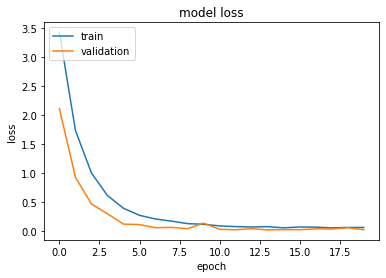

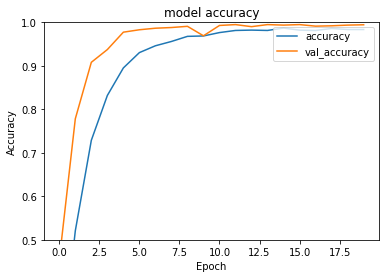

In [26]:
def plot_losses(history):  
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

def plot_accuracies(history):  
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.title('model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1])
    plt.legend(loc='upper right')
    plt.show()
plot_losses(history)
plot_accuracies(history)